In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import WMAP3

In [3]:
# Simulation Data Analysis and Intepretation 
# EXERCISE 1

# determine stellar mass

# load information from ascii files (mass of star particle, x, y and z coordinates) for both AGN and noAGN runs

m_star_noAGN, x_noAGN, y_noAGN, z_noAGN, a_noAGN = np.loadtxt('StarParticles_M0204_NoAGN_z0.dat', usecols=(0,1,2,3,4), unpack=True)
m_star_AGN, x_AGN, y_AGN, z_AGN, a_AGN = np.loadtxt('StarParticles_M0204_AGN_z0.dat', usecols=(0,1,2,3,4), unpack=True)


In [4]:
# calculate radius of each stellar particle (in units of kpc/h)

r_noAGN = np.sqrt(x_noAGN**2 + y_noAGN**2 + z_noAGN**2)
r_AGN = np.sqrt(x_AGN**2 + y_AGN**2 + z_AGN**2)


In [39]:
# calculate total stellar mass by choosing only the particles with a radius within 1/10*R_vir 

# virial radii
R_vir_noAGN = 281 #kpc/h
R_vir_AGN = 265 #kpc/h


# stellar mass 
# multiply by 1e10 because of the units of the star particle masses
# the brakets contain the condition to choose only the particles within the wanted radius

M_stellar_noAGN = np.sum(m_star_noAGN[r_noAGN < 1/10*R_vir_noAGN])*1e10
M_stellar_AGN = np.sum(m_star_AGN[r_AGN < 1/10*R_vir_AGN])*1e10 


In [10]:
print('Stellar mass without AGN:', M_stellar_noAGN, ' and with AGN:', M_stellar_AGN)

Stellar mass without AGN: 324798872999.99994  and with AGN: 147798176000.0


In [11]:
# determine conversion efficiency 

# halo masses
M_halo_noAGN = 5.2e12 #M_sun/h
M_halo_AGN = 4.3e12 #M_sun/h

# baryon fraction f_bar = Omega_bar/Omega_matter; take values from literature for WMPA3 cosmology 

f_bar = 0.04/0.226

# conversion efficiency 
eff_noAGN = M_stellar_noAGN/(f_bar*M_halo_noAGN)
eff_AGN = M_stellar_AGN/(f_bar*M_halo_AGN)

print('Conversion efficieny without AGN:', eff_noAGN, 'and with AGN:', eff_AGN)

Conversion efficieny without AGN: 0.3529064677788461 and with AGN: 0.19419992893023255


12.504457269340161 12.633468455579587
12.586992157395374 12.7160033436348
10.929011186239425
11.029011186239424


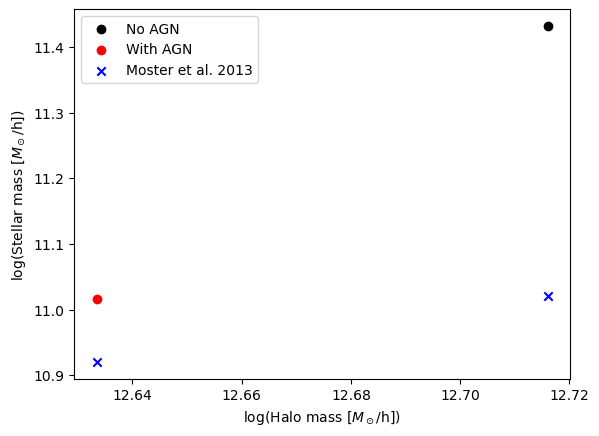

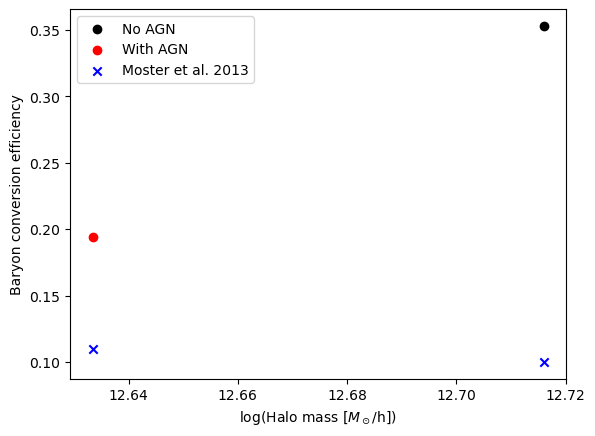

In [45]:
# Plotting and comparison to semi-empirical models Moster 2013 Figure 5 (redshift z=0)

# read baryon conversion efficiency value from Fig 5 for log(M_h/M_sun) = 12.5 and 12.6, and plot it directly in my plot
# convert my values from M_sun/h to M_sun units in order to compare to Moster 2019

h = 0.743 #WMAP# cosmology

# multiply my values by h so that I can take the right values from the plot from Moster 2019
print(np.log10(M_halo_AGN*h), np.log10(M_halo_AGN))
print(np.log10(M_halo_noAGN*h), np.log10(M_halo_noAGN))

# convert values from Moster 2019 back to units of M_sun/h to overplot with my values
print(np.log10(10**10.8/h))
print(np.log10(10**10.9/h))


# plot the stellar mass vs halo mass 
plt.scatter(np.log10(M_halo_noAGN), np.log10(M_stellar_noAGN), label='No AGN', color='black')
plt.scatter(np.log10(M_halo_AGN), np.log10(M_stellar_AGN), label = 'With AGN', color='red')
plt.scatter(np.log10(M_halo_AGN), 10.92, label='Moster et al. 2013', marker='x', color='blue')
plt.scatter(np.log10(M_halo_noAGN), 11.02, marker='x', color='blue')
plt.xlabel('log(Halo mass [$M_\odot$/h])')
plt.ylabel('log(Stellar mass [$M_\odot$/h])')
plt.legend()


# plot the baryon conversion efficiency vs halo mass
plt.figure()
plt.scatter(np.log10(M_halo_noAGN), eff_noAGN, label='No AGN', color='black')
plt.scatter(np.log10(M_halo_AGN), eff_AGN, label = 'With AGN', color='red')
plt.scatter(np.log10(M_halo_AGN), 0.11, label='Moster et al. 2013', marker='x', color='blue')
plt.scatter(np.log10(M_halo_noAGN), 0.10, marker='x', color='blue')
plt.xlabel('log(Halo mass [$M_\odot$/h])' )
plt.ylabel('Baryon conversion efficiency')
plt.legend()

In [13]:
# EXERCISE 2.a.

# 3D ditribution of star particles 


# compute stellar ages; use astropy.cosmology packes with WMAP3 cosmology 

# convert scale factor to redshift
redshift_noAGN = 1/a_noAGN - 1
redshift_AGN = 1/a_AGN - 1

# subtract birth age of star from present-day hubble time to get stellar ages in Gyrs; add .value to only have numbers without units as there raise problems in the plotting
age_noAGN = WMAP3.age(0).value - WMAP3.age(redshift_noAGN).value
age_AGN = WMAP3.age(0).value - WMAP3.age(redshift_AGN).value


# choose only star particles with radius < 1/10*R_vir

# index of particles with radius < 1/10*R_vir (condition)
ksel_noAGN = r_noAGN < 1/10*R_vir_noAGN
ksel_AGN = r_AGN < 1/10*R_vir_AGN


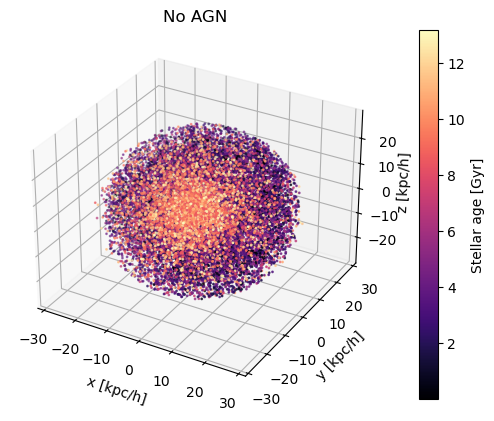

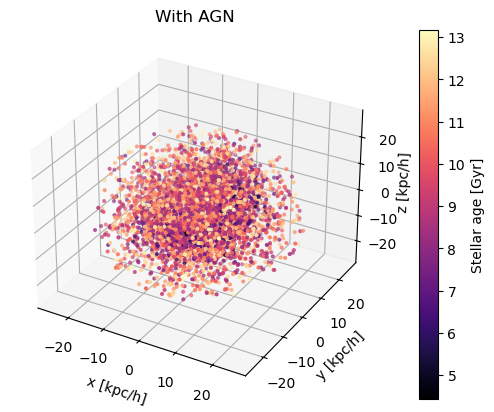

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')


p = ax.scatter(x_noAGN[ksel_noAGN], y_noAGN[ksel_noAGN], z_noAGN[ksel_noAGN], c = age_noAGN[ksel_noAGN], cmap = plt.cm.magma, s = 1)
ax.set_xlabel('x [kpc/h]')
ax.set_ylabel('y [kpc/h]')
ax.set_zlabel('z [kpc/h]', rotation = 90)
ax.zaxis.labelpad=-1
plt.title('No AGN')
fig.colorbar(p, ax=ax, label='Stellar age [Gyr]', pad = 0.08)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
p = ax.scatter(x_AGN[ksel_AGN], y_AGN[ksel_AGN], z_AGN[ksel_AGN], c = age_AGN[ksel_AGN], cmap = plt.cm.magma, s = 4)
ax.set_xlabel('x [kpc/h]')
ax.set_ylabel('y [kpc/h]')
ax.set_zlabel('z [kpc/h]', rotation = 90)
ax.zaxis.labelpad=-0.7 
plt.title('With AGN')
plt.colorbar(p, ax=ax, label='Stellar age [Gyr]', pad = 0.08)
plt.show()


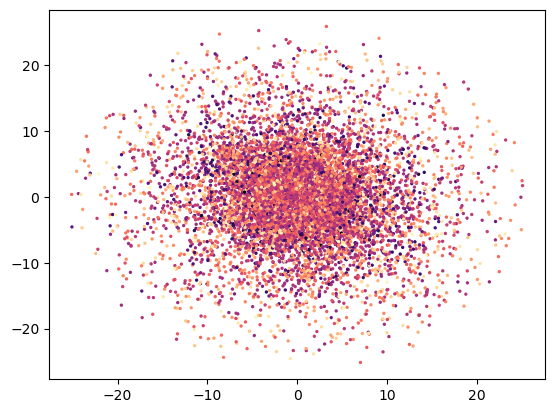

In [38]:
plt.scatter(x_AGN[ksel_AGN], y_AGN[ksel_AGN], c = age_AGN[ksel_AGN], cmap=plt.cm.magma, s = 2 )

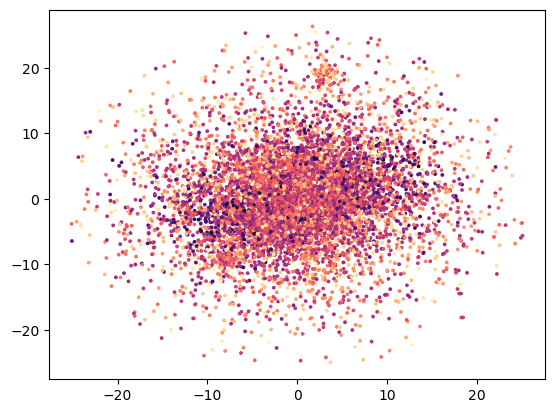

In [39]:
plt.scatter(x_AGN[ksel_AGN], z_AGN[ksel_AGN], c = age_AGN[ksel_AGN], cmap=plt.cm.magma, s = 3 )

Text(0.5, 1.0, '2D distribution of star particles (AGN run)')

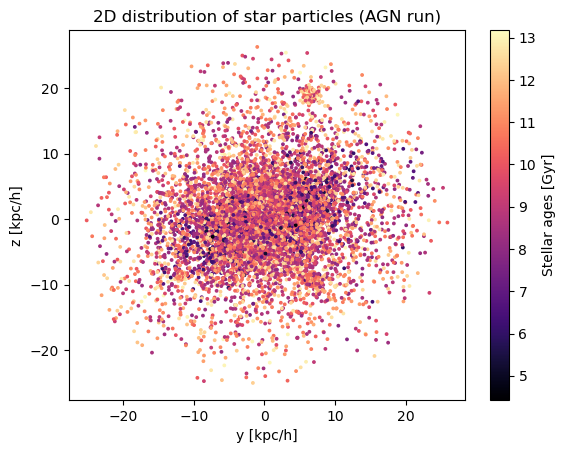

In [23]:
plt.scatter(y_AGN[ksel_AGN], z_AGN[ksel_AGN], c = age_AGN[ksel_AGN], cmap=plt.cm.magma, s = 3 )
plt.xlabel('y [kpc/h]')
plt.ylabel('z [kpc/h]')
plt.colorbar(label = 'Stellar ages [Gyr]')
plt.title('2D distribution of star particles (AGN run)')

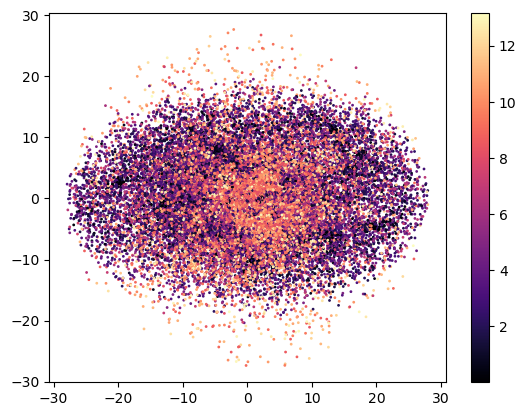

In [41]:
plt.scatter(x_noAGN[ksel_noAGN], y_noAGN[ksel_noAGN], c = age_noAGN[ksel_noAGN], cmap=plt.cm.magma, s = 1 )
plt.colorbar()

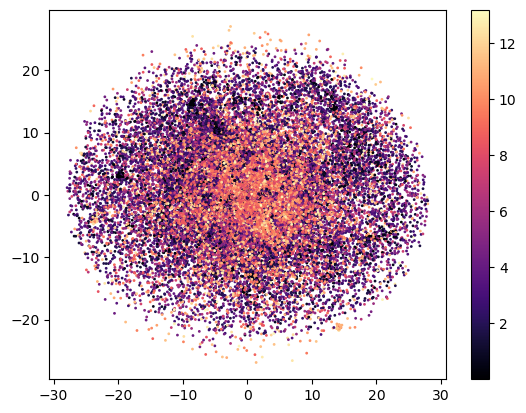

In [42]:
plt.scatter(x_noAGN[ksel_noAGN], z_noAGN[ksel_noAGN], c = age_noAGN[ksel_noAGN], cmap=plt.cm.magma, s = 1)
plt.colorbar()

Text(0.5, 1.0, '2D distribution of star particles (noAGN run)')

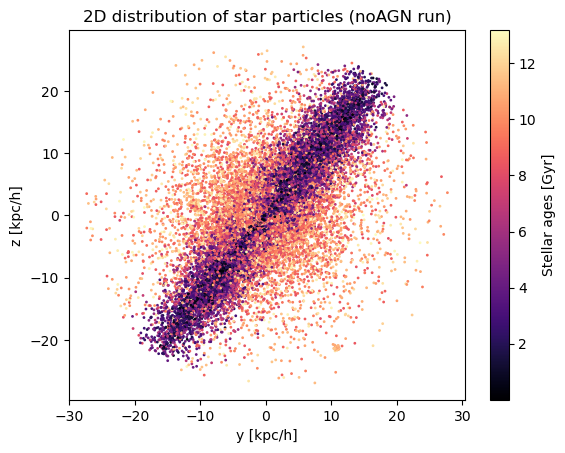

In [21]:
plt.scatter(y_noAGN[ksel_noAGN], z_noAGN[ksel_noAGN], c = age_noAGN[ksel_noAGN], cmap=plt.cm.magma, s = 1)
plt.xlabel('y [kpc/h]')
plt.ylabel('z [kpc/h]')
plt.colorbar(label = 'Stellar ages [Gyr]')
plt.title('2D distribution of star particles (noAGN run)')

In [16]:
# EXERCISE 2.b.

# median stellar ages, select only stars with r<1/10*R_vir, multiply by 1e9 to convert Gyr in yr

median_age_noAGN = np.median(age_noAGN[ksel_noAGN])*1e9
median_age_AGN = np.median(age_AGN[ksel_AGN])*1e9

print('Median stellar ages without AGN:', median_age_noAGN,'and with AGN:', median_age_AGN)


Median stellar ages without AGN: 7720633327.068665 and with AGN: 9493936292.630949


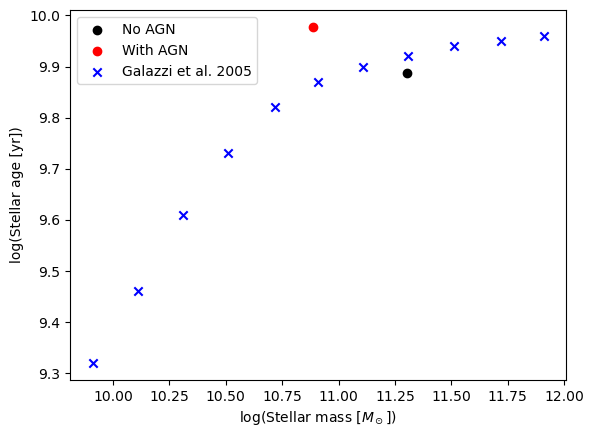

In [19]:
# values from Tabel 2 in Gallazi et al 2005 

M_stellar_Gallazi = np.array([9.91 ,10.11,10.31,10.51,10.72,10.91,11.11,11.31,11.51,11.72,11.91])
age_Gallazi = np.array([9.32 ,9.46,9.61,9.73,9.82 ,9.87 ,9.90 ,9.92 ,9.94 ,9.95, 9.96 ])

# in order to compare with values from table 2 mupltiply my values by h=0.743

h = 0.743 #WMAP# cosmology

M_stellar_noAGN = np.sum(m_star_noAGN[ksel_noAGN])*1e10
M_stellar_AGN = np.sum(m_star_AGN[ksel_AGN])*1e10 

plt.scatter(np.log10(M_stellar_noAGN*h), np.log10(median_age_noAGN), label = 'No AGN', color = 'black')
plt.scatter(np.log10(M_stellar_AGN*h), np.log10(median_age_AGN), label = 'With AGN', color = 'red')
plt.scatter(M_stellar_Gallazi, age_Gallazi, marker = 'x', color = 'blue', label='Galazzi et al. 2005')
plt.xlabel('log(Stellar mass [$M_\odot$])')
plt.ylabel('log(Stellar age [yr])')
plt.legend()


[-0.18648815  8.34653868] [0.08945696 9.01193998]


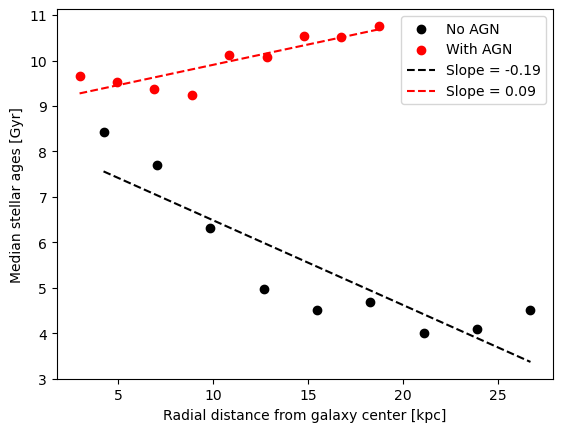

In [106]:
# EXERCISE 2.c. 


# plot median stellar ages vs radial distance from the galaxy centre


# do the binning, take different concentric regions 


# noAGN run
stellar_ages_noAGN = []    #median stellar ages in the different annuli 
radial_distance_noAGN = [] # radial distance

n = 10 #binning
for i in range(1,n):
    r1 = 1/10*R_vir_noAGN*i/n       #inner radius
    r2 = 1/10*R_vir_noAGN*((i+1)/n) #outer radius
    cond = (r1 < r_noAGN) & (r_noAGN < r2)  #condition to select radii
    median = np.median(age_noAGN[cond]) #take median of the stars inside this annulus

    stellar_ages_noAGN.append(median)
    radial_distance_noAGN.append((r1+r2)/2) #take average value of radius bin 


# AGN run
stellar_ages_AGN = []
radial_distance_AGN = []


for i in range(1,n):
    r1 = 1/10*R_vir_AGN*i/n       #inner radius
    r2 = 1/10*R_vir_AGN*((i+1)/n) #outer radius
    cond = (r1 < r_AGN) & (r_AGN < r2)  #condition to select radii
    median = np.median(age_AGN[cond]) #take median of the stars inside this annulus

    stellar_ages_AGN.append(median)
    radial_distance_AGN.append(((r1+r2)/2)*h) #take average value of radius bin; also multiply by h so that unit is kpc


# plot
    
plt.scatter(radial_distance_noAGN, stellar_ages_noAGN, label = 'No AGN', color = 'black')
plt.scatter(radial_distance_AGN, stellar_ages_AGN, label = 'With AGN', color = 'red')
plt.legend()
plt.xlabel('Radial distance from galaxy center [kpc]')
plt.ylabel('Median stellar ages [Gyr]')


# linear fit

coef_noAGN = np.polyfit(radial_distance_noAGN,stellar_ages_noAGN,1) #linear fit coefficients
fit_noAGN = np.poly1d(coef_noAGN)  #extrapolation
plt.plot(radial_distance_noAGN, fit_noAGN(radial_distance_noAGN), '--k', label = f'Slope = {round(coef_noAGN[0],2)}') #'--k'=black dashed line

coef_AGN = np.polyfit(radial_distance_AGN,stellar_ages_AGN,1) #linear fit coefficients
fit_AGN = np.poly1d(coef_AGN)  #extrapolation
plt.plot(radial_distance_AGN, fit_AGN(radial_distance_AGN), '--r', label = f'Slope = {round(coef_AGN[0],2)}') 

plt.legend()

print(coef_noAGN, coef_AGN)



Text(0, 0.5, 'log(Star formation rate [$M_\\odot$/yr])')

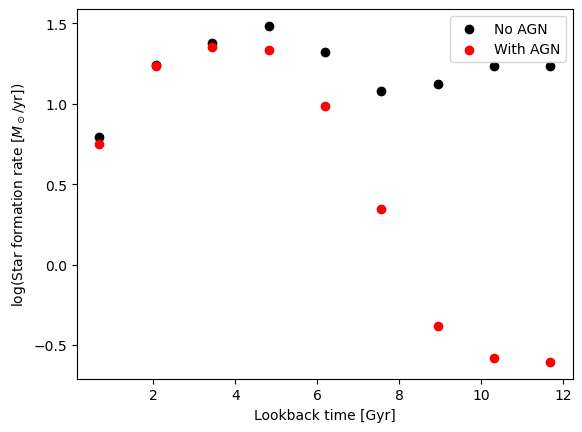

In [21]:
# EXERCISE 3

# star formation rates 

# bin ages of star particles in time

#total stellar masses within the different time bins
rate_noAGN = []
lookback_noAGN = []
rate_AGN = []
lookback_AGN = []

n = 10 #binning
for i in range(1,n):
    t1 =  13.75*i/n      #start time; times in Gyr
    t2 =   13.75*(i+1)/n   #end time


    cond_noAGN = (t1 < age_noAGN) & (age_noAGN < t2)        #condition to select stars within a certain time range
    total_mass_noAGN = np.sum(m_star_noAGN[cond_noAGN])     #total stellar mass formed in this bin; sum the individual stellar masses which were formed in this time range; mass in M_sun/h, also have to multiply by 1e10
    rate_noAGN.append(total_mass_noAGN/(t2-t1)*(10*h))      #divinde total mass by time interval to get rate; unit conversion to M_sun/yr by *(10/h)
    lookback_noAGN.append(13.75 - (t2+t1)/2)                #lookback time is present-day time - average between the time interval start and end



    cond_AGN = (t1 < age_AGN) & (age_AGN < t2)   
    total_mass_AGN = np.sum(m_star_AGN[cond_AGN])  
    rate_AGN.append(total_mass_AGN/(t2-t1)*(10*h))
    lookback_AGN.append(13.75 - (t2+t1)/2)  


plt.scatter(lookback_noAGN, np.log10(rate_noAGN), label = 'No AGN', color = 'black')
plt.scatter(lookback_AGN, np.log10(rate_AGN), label = 'With AGN', color = 'red')
plt.legend()
plt.xlabel('Lookback time [Gyr]')
plt.ylabel('log(Star formation rate [$M_\odot$/yr])')





Text(0, 0.5, 'log(Stellar half-mass radius [kpc])')

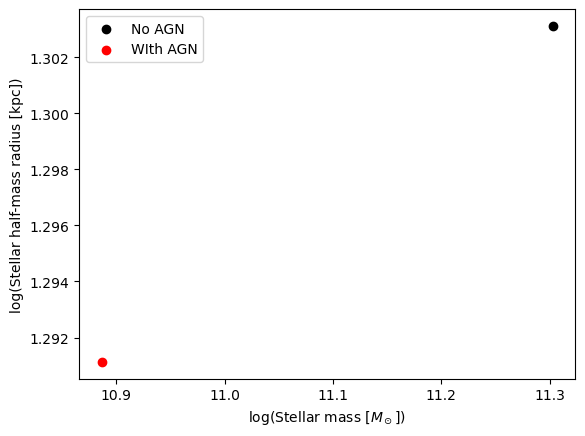

In [40]:
# EXERCISE 4

# compute projected stellar half-mass radius along z-axis which corresponds to the size

size_noAGN = np.max(z_noAGN[ksel_noAGN]) # take the maximum z coordinate of star particles obeying the ksel condition which was the condition for r < 1/10*R_vir
size_AGN = np.max(z_AGN[ksel_AGN])


plt.scatter(np.log10(M_stellar_noAGN*h), np.log10(size_noAGN*h), label = 'No AGN', color = 'black')
plt.scatter(np.log10(M_stellar_AGN*h), np.log10(size_AGN*h), label = 'With AGN', color = 'red')
plt.legend()
plt.xlabel('log(Stellar mass [$M_\odot$])')
plt.ylabel('log(Stellar half-mass radius [kpc])')
